In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC,SVR
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport

## Data-ingestion 

In [123]:
df=pd.read_csv('household_power_consumption.txt',sep=';')

C:\Users\Prashant\AppData\Local\Temp\ipykernel_18248\3914746486.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('household_power_consumption.txt',sep=';')


In [125]:
df_new=df.sample(n=15000)
df_new
df=df_new

### Insertion in Mongodb 

In [247]:
import pymongo
client = pymongo.MongoClient("mongodb://localhost:27017/")
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [248]:
DEFAULT_CONNECTION_URL = "mongodb://localhost:27017/"
DB_NAME = "household_electric_power"

# Establish a connection with mongoDB
client = pymongo.MongoClient(DEFAULT_CONNECTION_URL)

# Create a DB
dataBase = client[DB_NAME]

In [249]:
db_1 = client["household"]
COLLECTION_NAME = "household_data"
power_data = dataBase[COLLECTION_NAME]
db_1.power_data.insert_many(df.to_dict('records'))

### Reading from Mongodb 

In [250]:
df = pd.DataFrame(list(db_1.power_data.find()))

In [251]:
df

,_id,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,636e2dbcf001ec38b673af0b,9/8/2007,02:59:00,0.160,0.050,234.980,0.800,0.000,0.000,0.0
1,636e2dbcf001ec38b673af0c,19/2/2010,09:30:00,1.740,0.000,240.150,7.200,0.000,0.000,18.0
2,636e2dbcf001ec38b673af0d,10/9/2007,00:24:00,1.278,0.074,243.290,5.200,0.000,0.000,18.0
3,636e2dbcf001ec38b673af0e,7/1/2010,23:22:00,1.502,0.104,247.770,6.000,0.000,0.000,20.0
4,636e2dbcf001ec38b673af0f,8/12/2007,05:42:00,0.416,0.234,239.670,2.000,0.000,1.000,0.0
...,...,...,...,...,...,...,...,...,...,...
14995,636e2dbcf001ec38b673e99e,25/11/2010,08:26:00,1.8,0.084,239.13,7.4,1.0,0.0,18.0
14996,636e2dbcf001ec38b673e99f,12/7/2008,23:55:00,0.258,0.086,241.850,1.200,0.000,0.000,0.0
14997,636e2dbcf001ec38b673e9a0,19/4/2008,11:42:00,1.618,0.128,238.660,6.800,0.000,0.000,18.0
14998,636e2dbcf001ec38b673e9a1,26/7/2010,17:23:00,0.264,0.110,240.300,1.200,0.000,0.000,0.0


In [252]:
df.drop(columns=['_id'],inplace=True)

In [253]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,9/8/2007,02:59:00,0.160,0.050,234.980,0.800,0.000,0.000,0.0
1,19/2/2010,09:30:00,1.740,0.000,240.150,7.200,0.000,0.000,18.0
2,10/9/2007,00:24:00,1.278,0.074,243.290,5.200,0.000,0.000,18.0
3,7/1/2010,23:22:00,1.502,0.104,247.770,6.000,0.000,0.000,20.0
4,8/12/2007,05:42:00,0.416,0.234,239.670,2.000,0.000,1.000,0.0
...,...,...,...,...,...,...,...,...,...
14995,25/11/2010,08:26:00,1.8,0.084,239.13,7.4,1.0,0.0,18.0
14996,12/7/2008,23:55:00,0.258,0.086,241.850,1.200,0.000,0.000,0.0
14997,19/4/2008,11:42:00,1.618,0.128,238.660,6.800,0.000,0.000,18.0
14998,26/7/2010,17:23:00,0.264,0.110,240.300,1.200,0.000,0.000,0.0


In [256]:
from datetime import datetime
import calendar
mydate = datetime.strptime('1/11/2012','%m/%d/%Y')
calendar.month_name[mydate.month]

'January'

In [257]:
mydate = datetime.strptime(df['Date'],'%d/%m/%Y')

TypeError: strptime() argument 1 must be str, not Series

In [259]:
mydate=[]
for i in df['Date']:
    mydate.append(datetime.strptime(i,'%d/%m/%Y'))

In [260]:
type(i)

str

In [261]:
year=[]
day=[]
month=[]
for i in range(len(mydate)):
    year.append(mydate[i].year)
    day.append(mydate[i].day)
    month.append(mydate[i].month)

In [262]:
len(mydate)

15000

In [263]:
df['year']=year

In [264]:
df['month']=month
df['day']=day

In [265]:
df.drop(columns=['Date'],inplace=True)
df

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day
0,02:59:00,0.160,0.050,234.980,0.800,0.000,0.000,0.0,2007,8,9
1,09:30:00,1.740,0.000,240.150,7.200,0.000,0.000,18.0,2010,2,19
2,00:24:00,1.278,0.074,243.290,5.200,0.000,0.000,18.0,2007,9,10
3,23:22:00,1.502,0.104,247.770,6.000,0.000,0.000,20.0,2010,1,7
4,05:42:00,0.416,0.234,239.670,2.000,0.000,1.000,0.0,2007,12,8
...,...,...,...,...,...,...,...,...,...,...,...
14995,08:26:00,1.8,0.084,239.13,7.4,1.0,0.0,18.0,2010,11,25
14996,23:55:00,0.258,0.086,241.850,1.200,0.000,0.000,0.0,2008,7,12
14997,11:42:00,1.618,0.128,238.660,6.800,0.000,0.000,18.0,2008,4,19
14998,17:23:00,0.264,0.110,240.300,1.200,0.000,0.000,0.0,2010,7,26


In [266]:
temp=df['Time'][0]

In [267]:
h,m,s=temp.split(':')

In [268]:
temp2='a,b,c'

In [269]:
h

'02'

In [270]:
hours=[]
minutes=[]
seconds=[]
for i in df['Time']:
    h,m,s=temp.split(':')
    hours.append(float(h))
    minutes.append(float(m))
    seconds.append(float(s))

In [271]:
df['hours']=hours
df['minutes']=minutes
df['seconds']=seconds

In [272]:
df.drop(columns=['Time'],inplace=True)

In [273]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hours,minutes,seconds
0,0.160,0.050,234.980,0.800,0.000,0.000,0.0,2007,8,9,2.0,59.0,0.0
1,1.740,0.000,240.150,7.200,0.000,0.000,18.0,2010,2,19,2.0,59.0,0.0
2,1.278,0.074,243.290,5.200,0.000,0.000,18.0,2007,9,10,2.0,59.0,0.0
3,1.502,0.104,247.770,6.000,0.000,0.000,20.0,2010,1,7,2.0,59.0,0.0
4,0.416,0.234,239.670,2.000,0.000,1.000,0.0,2007,12,8,2.0,59.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.8,0.084,239.13,7.4,1.0,0.0,18.0,2010,11,25,2.0,59.0,0.0
14996,0.258,0.086,241.850,1.200,0.000,0.000,0.0,2008,7,12,2.0,59.0,0.0
14997,1.618,0.128,238.660,6.800,0.000,0.000,18.0,2008,4,19,2.0,59.0,0.0
14998,0.264,0.110,240.300,1.200,0.000,0.000,0.0,2010,7,26,2.0,59.0,0.0


In [274]:
df.seconds.unique()

array([0.])

In [275]:
df.drop(columns=['seconds'],inplace=True)

In [276]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hours,minutes
0,0.160,0.050,234.980,0.800,0.000,0.000,0.0,2007,8,9,2.0,59.0
1,1.740,0.000,240.150,7.200,0.000,0.000,18.0,2010,2,19,2.0,59.0
2,1.278,0.074,243.290,5.200,0.000,0.000,18.0,2007,9,10,2.0,59.0
3,1.502,0.104,247.770,6.000,0.000,0.000,20.0,2010,1,7,2.0,59.0
4,0.416,0.234,239.670,2.000,0.000,1.000,0.0,2007,12,8,2.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.8,0.084,239.13,7.4,1.0,0.0,18.0,2010,11,25,2.0,59.0
14996,0.258,0.086,241.850,1.200,0.000,0.000,0.0,2008,7,12,2.0,59.0
14997,1.618,0.128,238.660,6.800,0.000,0.000,18.0,2008,4,19,2.0,59.0
14998,0.264,0.110,240.300,1.200,0.000,0.000,0.0,2010,7,26,2.0,59.0


In [277]:
df.year.unique()

array([2007, 2010, 2008, 2009, 2006], dtype=int64)

## EDA 

In [278]:
df.duplicated().sum()

173

In [279]:
df.drop_duplicates()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hours,minutes
0,0.160,0.050,234.980,0.800,0.000,0.000,0.0,2007,8,9,2.0,59.0
1,1.740,0.000,240.150,7.200,0.000,0.000,18.0,2010,2,19,2.0,59.0
2,1.278,0.074,243.290,5.200,0.000,0.000,18.0,2007,9,10,2.0,59.0
3,1.502,0.104,247.770,6.000,0.000,0.000,20.0,2010,1,7,2.0,59.0
4,0.416,0.234,239.670,2.000,0.000,1.000,0.0,2007,12,8,2.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1.8,0.084,239.13,7.4,1.0,0.0,18.0,2010,11,25,2.0,59.0
14996,0.258,0.086,241.850,1.200,0.000,0.000,0.0,2008,7,12,2.0,59.0
14997,1.618,0.128,238.660,6.800,0.000,0.000,18.0,2008,4,19,2.0,59.0
14998,0.264,0.110,240.300,1.200,0.000,0.000,0.0,2010,7,26,2.0,59.0


In [280]:
df.isin(['?']).sum()

Global_active_power      194
Global_reactive_power    194
Voltage                  194
Global_intensity         194
Sub_metering_1           194
Sub_metering_2           194
Sub_metering_3             0
year                       0
month                      0
day                        0
hours                      0
minutes                    0
dtype: int64

In [281]:
df=df.replace('?',np.nan)

In [282]:
df.dropna(inplace=True)

In [283]:
df.isin(['?']).sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
month                    0
day                      0
hours                    0
minutes                  0
dtype: int64

In [284]:
for i in df:
    df[i] = df[i].astype(float)

In [285]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,14806.0,1.090992,1.052862,0.078,0.308,0.60,1.528,9.374
Global_reactive_power,14806.0,0.123249,0.111875,0.000,0.048,0.10,0.194,0.994
Voltage,14806.0,240.847464,3.205240,226.380,238.960,241.01,242.880,252.790
Global_intensity,14806.0,4.625355,4.423257,0.200,1.400,2.60,6.400,41.400
Sub_metering_1,14806.0,1.108334,6.055726,0.000,0.000,0.00,0.000,82.000
Sub_metering_2,14806.0,1.302918,5.780696,0.000,0.000,0.00,1.000,75.000
Sub_metering_3,14806.0,6.470080,8.428607,0.000,0.000,1.00,17.000,31.000
year,14806.0,2008.426719,1.132492,2006.000,2007.000,2008.00,2009.000,2010.000
month,14806.0,6.443469,3.418153,1.000,3.000,6.00,9.000,12.000
day,14806.0,15.755505,8.815390,1.000,8.000,16.00,23.000,31.000


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14806 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    14806 non-null  float64
 1   Global_reactive_power  14806 non-null  float64
 2   Voltage                14806 non-null  float64
 3   Global_intensity       14806 non-null  float64
 4   Sub_metering_1         14806 non-null  float64
 5   Sub_metering_2         14806 non-null  float64
 6   Sub_metering_3         14806 non-null  float64
 7   year                   14806 non-null  float64
 8   month                  14806 non-null  float64
 9   day                    14806 non-null  float64
 10  hours                  14806 non-null  float64
 11  minutes                14806 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


In [287]:
df['meter']=df['Sub_metering_1']+df['Sub_metering_2']+df['Sub_metering_3']

In [288]:
df.drop(columns=['Sub_metering_1','Sub_metering_2','Sub_metering_3'],inplace=True)

In [289]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,hours,minutes,meter
0,0.160,0.050,234.98,0.8,2007.0,8.0,9.0,2.0,59.0,0.0
1,1.740,0.000,240.15,7.2,2010.0,2.0,19.0,2.0,59.0,18.0
2,1.278,0.074,243.29,5.2,2007.0,9.0,10.0,2.0,59.0,18.0
3,1.502,0.104,247.77,6.0,2010.0,1.0,7.0,2.0,59.0,20.0
4,0.416,0.234,239.67,2.0,2007.0,12.0,8.0,2.0,59.0,1.0


In [290]:
X = df.drop(columns='meter')
Y = df['meter']

In [291]:
X.reset_index(drop=True, inplace=True)
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,year,month,day,hours,minutes
0,0.160,0.050,234.98,0.8,2007.0,8.0,9.0,2.0,59.0
1,1.740,0.000,240.15,7.2,2010.0,2.0,19.0,2.0,59.0
2,1.278,0.074,243.29,5.2,2007.0,9.0,10.0,2.0,59.0
3,1.502,0.104,247.77,6.0,2010.0,1.0,7.0,2.0,59.0
4,0.416,0.234,239.67,2.0,2007.0,12.0,8.0,2.0,59.0
...,...,...,...,...,...,...,...,...,...
14801,1.800,0.084,239.13,7.4,2010.0,11.0,25.0,2.0,59.0
14802,0.258,0.086,241.85,1.2,2008.0,7.0,12.0,2.0,59.0
14803,1.618,0.128,238.66,6.8,2008.0,4.0,19.0,2.0,59.0
14804,0.264,0.110,240.30,1.2,2010.0,7.0,26.0,2.0,59.0


In [167]:
ProfileReport(X)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Feature Selection and Pre-processing 

In [292]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 21.98
1 15.4
2 16.39
3 16.18
4 6.5
5 10.29
6 13.27
7 0.0
8 0.0


In [293]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14806 entries, 0 to 14805
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    14806 non-null  float64
 1   Global_reactive_power  14806 non-null  float64
 2   Voltage                14806 non-null  float64
 3   Global_intensity       14806 non-null  float64
 4   year                   14806 non-null  float64
 5   month                  14806 non-null  float64
 6   day                    14806 non-null  float64
 7   hours                  14806 non-null  float64
 8   minutes                14806 non-null  float64
dtypes: float64(9)
memory usage: 1.0 MB


In [294]:
X.drop(columns=['hours','minutes'],inplace=True)

In [295]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14806 entries, 0 to 14805
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    14806 non-null  float64
 1   Global_reactive_power  14806 non-null  float64
 2   Voltage                14806 non-null  float64
 3   Global_intensity       14806 non-null  float64
 4   year                   14806 non-null  float64
 5   month                  14806 non-null  float64
 6   day                    14806 non-null  float64
dtypes: float64(7)
memory usage: 809.8 KB


In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
scaler=StandardScaler()

In [298]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

<AxesSubplot:>

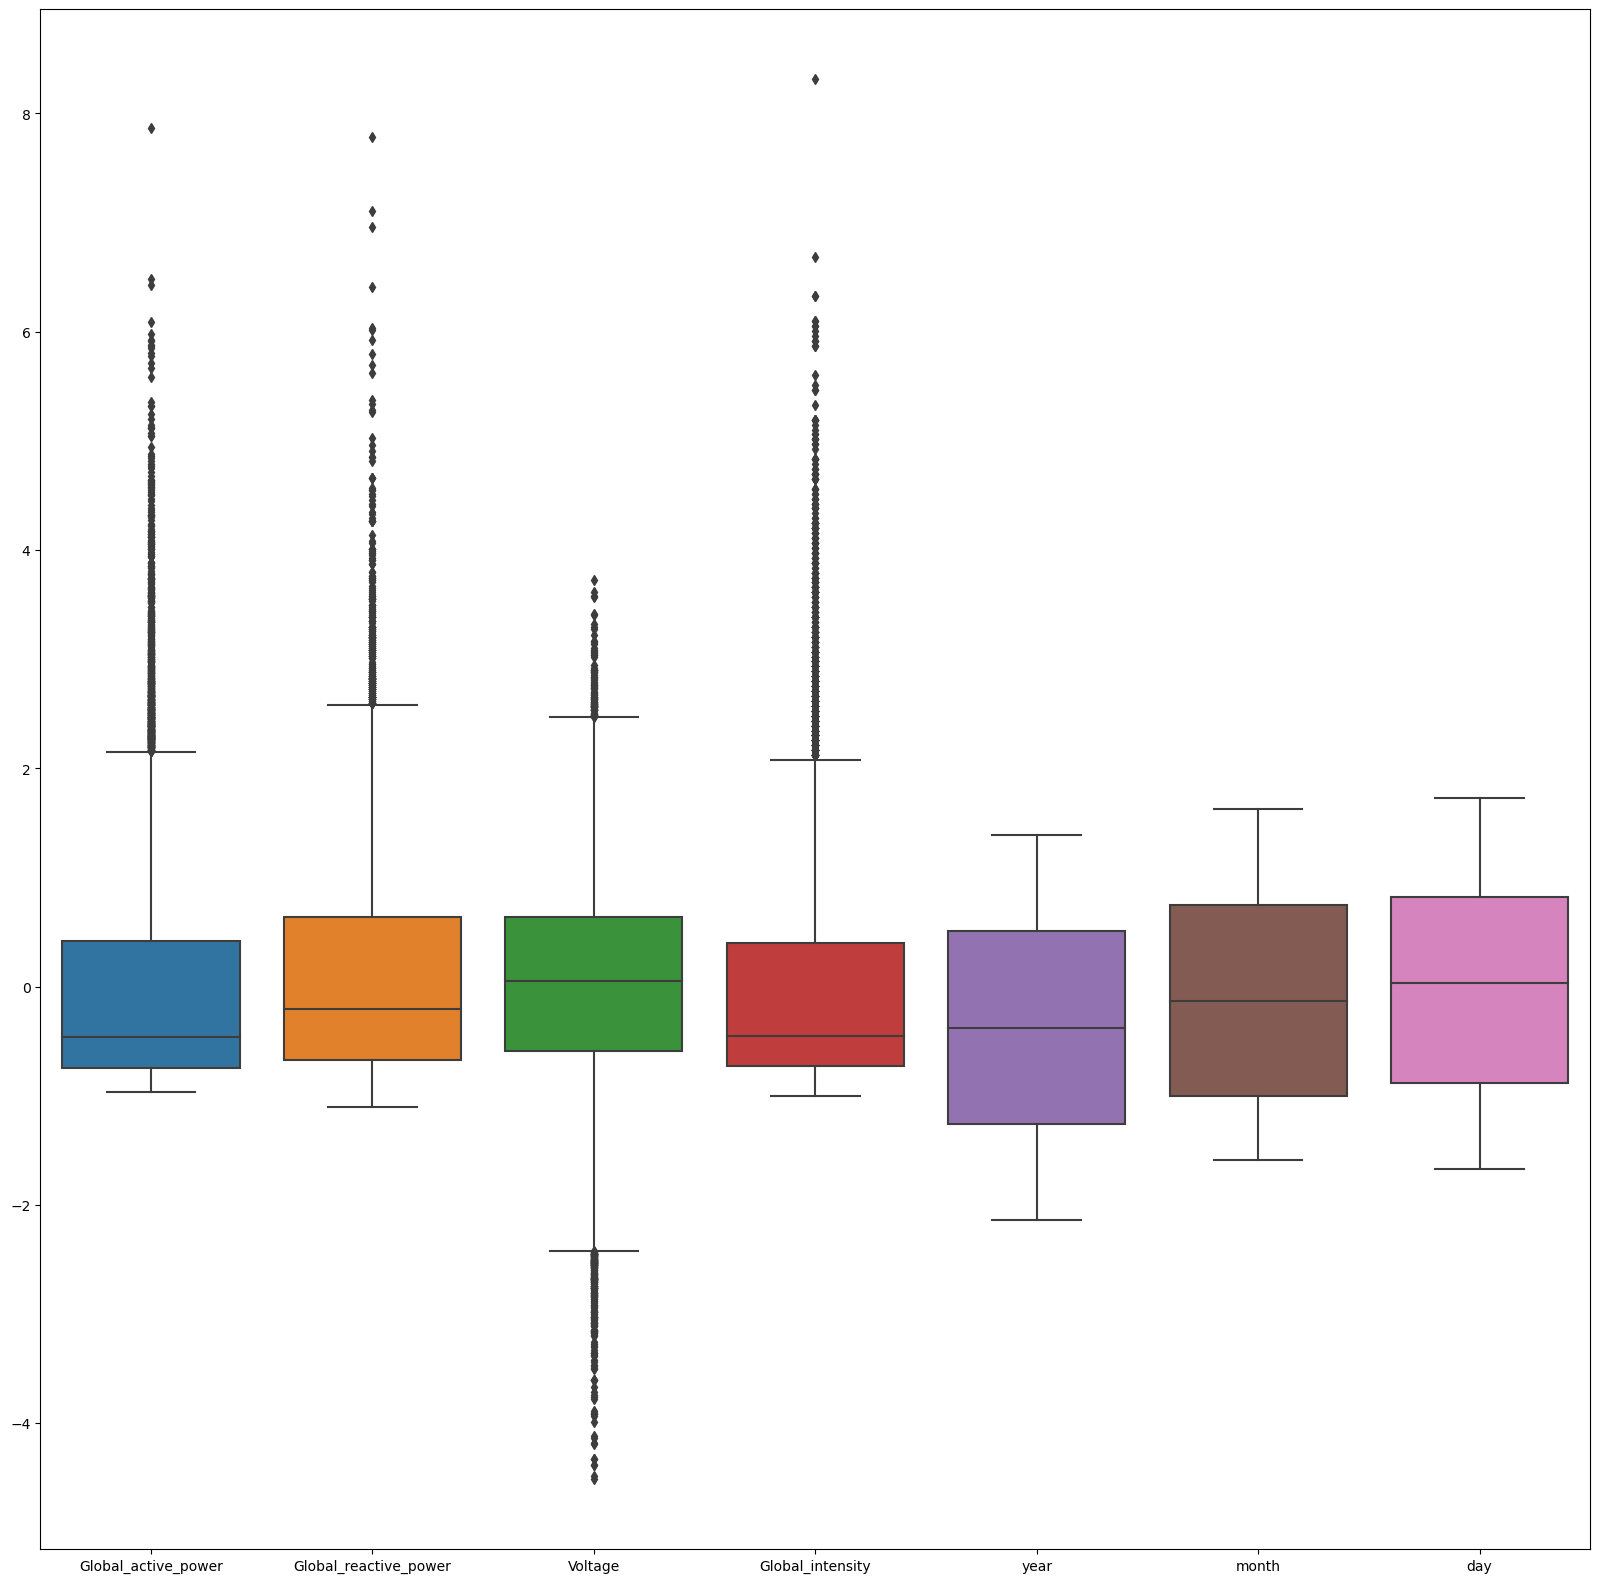

In [299]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = X , ax = ax)

## Model Training 

In [300]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [301]:
Y_new=Y/(Y.max()-Y.min())

In [302]:
x_train,x_test,y_train,y_test=train_test_split(X , Y_new , test_size = .2, random_state=42)

In [303]:
lin_reg=LinearRegression()

In [304]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [305]:
lin_reg.score(x_test,y_test)

0.7453600823338854

In [307]:
ridge=RidgeCV()

In [308]:
ridge.fit(x_train,y_train)

RidgeCV()

In [309]:
ridge.score(x_test,y_test)

0.74536923789284

In [310]:
elastic=ElasticNetCV()

In [311]:
elastic.fit(x_train,y_train)
elastic.score(x_test,y_test)

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0110693523245331, tolerance: 0.010849373918403337
  model = cd_fast.enet_coordinate_descent_gram(


0.7440283855462599

In [337]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [338]:
svr.score(x_test,y_test)

0.6170629074696818

## Hyper-parameter Tuning 

In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
grid_param={'kernel' : ['linear','rbf'],
            'C': [0.5,1.0,1.5,2]
           }

In [316]:
grid_search = GridSearchCV(estimator=svr,
                     param_grid=grid_param,
                     cv=5)

In [339]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(C=1.5, kernel='linear'),
             param_grid={'C': [0.5, 1.0, 1.5, 2], 'kernel': ['linear', 'rbf']})

In [340]:
grid_search.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [341]:
svr=SVR(kernel='linear',C=0.5)
svr.fit(x_train,y_train)

SVR(C=0.5, kernel='linear')

In [342]:
svr.score(x_test,y_test)

0.6509655786118898